In [1]:
# pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.graph_objs as go
from plotly.subplots import make_subplots

In [3]:
df_ele = pd.read_csv('./전력 사용량 14차.csv')
df_ele = df_ele.drop(columns=['Unnamed: 0'])
df_pop = pd.read_csv('./2011~2022_인구수(2).csv')
df_pop = df_pop.drop(columns=['Unnamed: 0'])

In [4]:
df_pop

,연월,시도,인구수,연도,월
0,2011.01,서울특별시,10312835,2011,1
1,2011.02,서울특별시,10314245,2011,2
2,2011.03,서울특별시,10307783,2011,3
3,2011.04,서울특별시,10301829,2011,4
4,2011.05,서울특별시,10295643,2011,5
...,...,...,...,...,...
2443,2022.08,제주특별자치도,679016,2022,8
2444,2022.09,제주특별자치도,678426,2022,9
2445,2022.10,제주특별자치도,678324,2022,10
2446,2022.11,제주특별자치도,678373,2022,11


In [5]:
df_pop['시도'].unique()

array(['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시',
       '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도',
       '경상남도', '제주특별자치도'], dtype=object)

In [6]:
df_pop['연도'].unique()

array([2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022], dtype=int64)

In [7]:
col2=[2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022]

In [67]:
df_pop_s['연도']

0      2011
1      2011
2      2011
3      2011
4      2011
       ... 
139    2022
140    2022
141    2022
142    2022
143    2022
Name: 연도, Length: 144, dtype: int64

In [16]:
year = 2011
# month = 1
sido = '광주광역시'
pop_ver = df_pop.query('연도==@year & 시도==@sido')

In [17]:
pop_data = pop_ver[['시도','월','인구수']]
pop_data

,시도,월,인구수
576,광주광역시,1,1456308
577,광주광역시,2,1458195
578,광주광역시,3,1458326
579,광주광역시,4,1458814
580,광주광역시,5,1459615
581,광주광역시,6,1459862
582,광주광역시,7,1461368
583,광주광역시,8,1462915
584,광주광역시,9,1463432
585,광주광역시,10,1464073


In [18]:
year = 2011
# month = 1
sido = '광주광역시'
ele_ver = df_ele.query('연도==@year & 시도==@sido')

In [20]:
ele_data = ele_ver[['시도','월','사용량']]
ele_data

,시도,월,사용량
21,광주광역시,1,757197
225,광주광역시,2,717292
429,광주광역시,3,672951
633,광주광역시,4,669154
837,광주광역시,5,615840
1041,광주광역시,6,626417
1245,광주광역시,7,674555
1449,광주광역시,8,712046
1653,광주광역시,9,673056
1857,광주광역시,10,618928


In [7]:
## 시도별 월별 총인구수 df만들고 x축 : 1~12월 / y축 : 인구수

In [ ]:
# fig.update_yaxes(title_text="인구수", secondary_y=False)
# fig.update_yaxes(title_text="전력사용량", secondary_y=True)

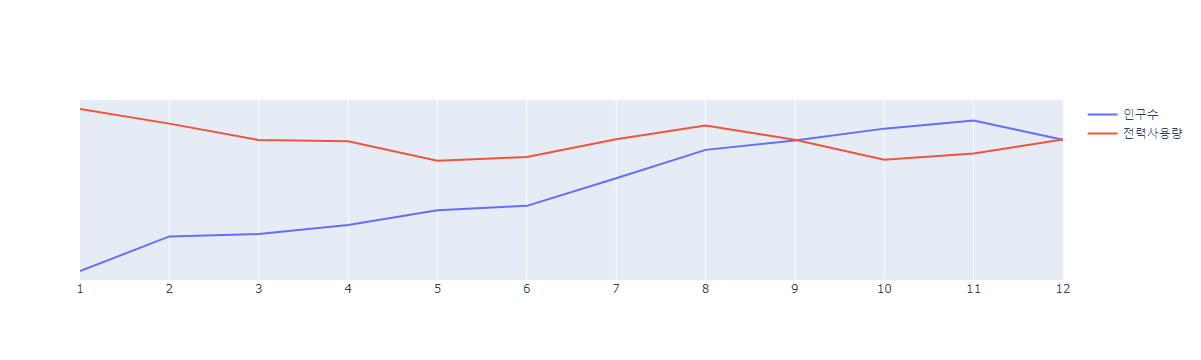

In [48]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=pop_data['월'],y=pop_data['인구수']*50,mode='lines',name='인구수'))
fig.add_trace(go.Scatter(x=ele_data['월'],y=ele_data['사용량']+72500000,mode='lines',name='전력사용량'))
fig.update_xaxes(range=[1,12] ,tickmode='linear', dtick=1)
fig.update_layout(yaxis=dict(
        tickmode='array',
        tickvals=[],
        ticktext=[]
    ))
fig.show()

In [88]:
df_pop.head(2)

,연월,시도,인구수,연도,월
0,2011.01,서울특별시,10312835,2011,1
1,2011.02,서울특별시,10314245,2011,2


In [93]:
df_pop_sum = df_pop.groupby(['연도','시도'])[['인구수']].sum().reset_index()

In [94]:
df_ele_sum = df_ele.groupby(['연도','시도'])[['사용량']].sum().reset_index()

In [96]:
df_pop_sum

,연도,시도,인구수
0,2011,강원도,18388852
1,2011,경기도,142430553
2,2011,경상남도,39590704
3,2011,경상북도,32298648
4,2011,광주광역시,17530888
...,...,...,...
199,2022,전라남도,21901654
200,2022,전라북도,21327284
201,2022,제주특별자치도,8135032
202,2022,충청남도,25444896


In [95]:
df_ele_sum

,연도,시도,사용량
0,2010,강원도,14848023
1,2010,경기도,93074871
2,2010,경상남도,31549217
3,2010,경상북도,41589043
4,2010,광주광역시,7860058
...,...,...,...
199,2021,전라남도,33486887
200,2021,전라북도,21486859
201,2021,제주특별자치도,5687731
202,2021,충청남도,48801625


In [168]:
df_pop_sum['사용량'] = df_ele_sum['사용량']

In [172]:
df_pop_sum.to_csv('2011~2022_시도별_인구수&전력사용량.csv')

In [173]:
sido = '서울특별시'
pop_ver2 = df_pop_sum.query('시도==@sido')

In [174]:
pop_data2 = pop_ver2[['연도','시도','인구수','사용량']]
pop_data2

,연도,시도,인구수,사용량
8,2011,서울특별시,123426072,47295099
25,2012,서울특별시,122741879,46902993
42,2013,서울특별시,122095491,47234105
59,2014,서울특별시,121535448,46555107
76,2015,서울특별시,120865523,45018864
93,2016,서울특별시,119776759,45381486
110,2017,서울특별시,118857535,46493234
127,2018,서울특별시,117723906,46298159
144,2019,서울특별시,117027908,47810212
161,2020,서울특별시,116536558,47167207


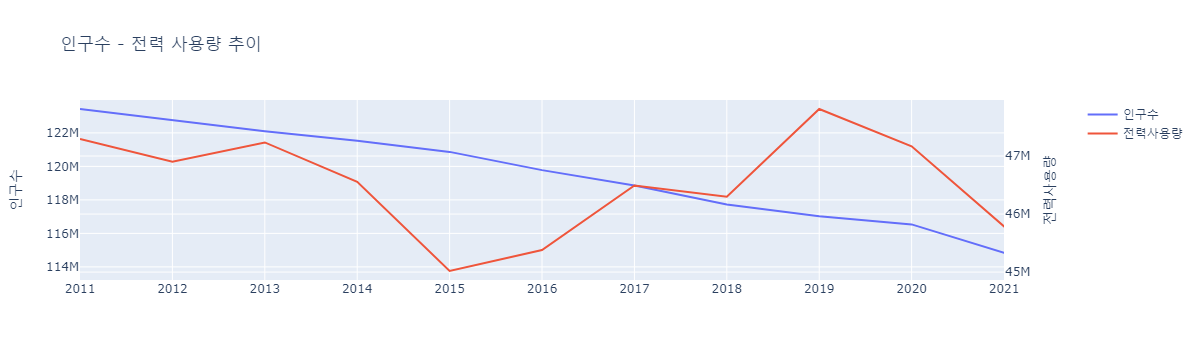

In [175]:
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(go.Scatter(x=pop_data2['연도'], y=pop_data2['인구수'], mode='lines', name='인구수'), secondary_y=False)
fig.add_trace(go.Scatter(x=pop_data2['연도'], y=pop_data2['사용량'], mode='lines', name='전력사용량'), secondary_y=True)

fig.update_xaxes(range=[2011,2021], tickmode='linear', dtick=1)
fig.update_yaxes(title_text="인구수", secondary_y=False)
fig.update_yaxes(title_text="전력사용량", secondary_y=True)

fig.update_layout(title='인구수 - 전력 사용량 추이')
fig.show()